<a href="https://colab.research.google.com/github/Superdityaa/Analisa-Capres-2024/blob/main/Analisa_Capres_2024_Data_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ganjar.csv')
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 10:31:40 +0000 2023,1735608555141730048,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",0,0,0,0,in,1690610120311589888,1735608555141730048,firdaraisyaa,https://twitter.com/firdaraisyaa/status/173560...
1,1,Fri Dec 15 10:31:40 +0000 2023,1735608554323950080,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",0,0,0,0,in,1691369523004489984,1735608554323950080,zaraauliaaia,https://twitter.com/zaraauliaaia/status/173560...
2,2,Fri Dec 15 10:31:39 +0000 2023,1735608552843259904,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,0,0,0,0,in,1690492185102400000,1735608552843259904,adamalvnto1,https://twitter.com/adamalvnto1/status/1735608...
3,3,Fri Dec 15 10:31:38 +0000 2023,1735608549248719872,Mengagumi betapa Mas Ganjar mampu menjaga kese...,0,0,0,0,in,1689128132589329920,1735608549248719872,ZivaOktavia,https://twitter.com/ZivaOktavia/status/1735608...
4,4,Fri Dec 15 10:31:38 +0000 2023,1735608548602889984,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,0,0,0,0,in,1688485501551160064,1735608548602889984,dindafiitriii,https://twitter.com/dindafiitriii/status/17356...


In [ ]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,Kebersamaan keluarga Mas Ganjar Pranowo adalah...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak Ganjar Mahfud #KerjaB3...,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,Kemesraan dalam keluarga Ganjar Pranowo adalah...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,Kebersamaan Ganjar Pranowo dengan keluarganya ...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


# **Cleaning Data**



In [ ]:
#Menghapus tweet komentar yang double
df = df.drop_duplicates(subset=['full_text'])
df.duplicated().sum()

0

In [ ]:
#Menghapus tweet yang komentar kosongan
df = df.dropna()
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text) #Menghapus mention
  text = re.sub(r'#\W+', '', text) #Menghapus hastag(#)
  text = re.sub(r'RT[\s]+', '', text) #Menghapus retweet
  text = re.sub(r'https?://\S+', '', text) #Menghapus URL

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #Menghapus non alfa-numerik
  text = re.sub(r'\s+', '', text), strip() #Menghapus spasi berlebih
  return text

  df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,"ganjar pranowo dan pak mahfud md, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"ganjar pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan ganjar dan mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga ganjar pranowo dan mahfud md dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,kebersamaan keluarga mas ganjar pranowo adalah...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak ganjar mahfud #kerjab3...,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,kemesraan dalam keluarga ganjar pranowo adalah...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,kebersamaan ganjar pranowo dengan keluarganya ...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


# Normalisasi

In [ ]:
#Normalisasi Text

norm = {"prabowo": " ", "anis": " ", "anies": " ", "owo": " ", "yg": " yang "}

def normalisasi(str_text):
    for i in norm:
      str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,"ganjar pran dan pak mahfud md, semoga kepemim...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"ganjar pran , gubernur yang bisa menjadi inspi...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan ganjar dan mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga ganjar pran dan mahfud md dapat membaw...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,kebersamaan keluarga mas ganjar pran adalah b...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak ganjar mahfud #kerjab3...,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,kemesraan dalam keluarga ganjar pran adalah c...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,kebersamaan ganjar pran dengan keluarganya me...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
#Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,"ganjar pran pak mahfud md, semoga kepemimpina...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"ganjar pran , gubernur bisa menjadi inspirasi ...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan ganjar mahfud tim kunci keberhasil...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga ganjar pran mahfud md membawa semangat...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023


In [ ]:
#Tokenisasi (Pemisahan Kalimat menjadi pecahan kata)

tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [ganjar, pran, pak, mahfud, md,, semoga, kepem...
1      [ganjar, pran, ,, gubernur, bisa, menjadi, ins...
2      [kebersamaan, ganjar, mahfud, tim, kunci, kebe...
3      [mengagumi, betapa, mas, ganjar, mampu, menjag...
4      [semoga, ganjar, pran, mahfud, md, membawa, se...
                             ...                        
418    [kebersamaan, keluarga, mas, ganjar, pran, buk...
419    [all, in, total, dukung, pak, ganjar, mahfud, ...
420    [kemesraan, keluarga, ganjar, pran, cerminan, ...
421    [kebersamaan, ganjar, pran, keluarganya, menja...
422    [mahfud, md,, semoga, kepedulian, kebersamaan,...
Name: full_text, Length: 423, dtype: object

# Labelling

In [ ]:
data = pd.read_csv('TerjemahanGanjar.csv', index_col=0)
data

,full_text,tweet_english
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...
...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...


In [ ]:
!pip install nltk
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_english'])
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

  print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
  print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 0
Netral = 1
Negatif = 0

Total Data : 1
Hasil Analisis Data:
Positif = 0
Netral = 2
Negatif = 0

Total Data : 2
Hasil Analisis Data:
Positif = 1
Netral = 2
Negatif = 0

Total Data : 3
Hasil Analisis Data:
Positif = 1
Netral = 3
Negatif = 0

Total Data : 4
Hasil Analisis Data:
Positif = 2
Netral = 3
Negatif = 0

Total Data : 5
Hasil Analisis Data:
Positif = 3
Netral = 3
Negatif = 0

Total Data : 6
Hasil Analisis Data:
Positif = 4
Netral = 3
Negatif = 0

Total Data : 7
Hasil Analisis Data:
Positif = 5
Netral = 3
Negatif = 0

Total Data : 8
Hasil Analisis Data:
Positif = 5
Netral = 3
Negatif = 1

Total Data : 9
Hasil Analisis Data:
Positif = 6
Netral = 3
Negatif = 1

Total Data : 10
Hasil Analisis Data:
Positif = 7
Netral = 3
Negatif = 1

Total Data : 11
Hasil Analisis Data:
Positif = 7
Netral = 4
Negatif = 1

Total Data : 12
Hasil Analisis Data:
Positif = 8
Netral = 4
Negatif = 1

Total Data : 13
Hasil Analisis Data:
Positif = 9
Netral = 4
Negatif = 1

Tot

In [ ]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...,Positif
...,...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...,Negatif
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...,Positif
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...,Positif
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...,Positif


# Visualisasi

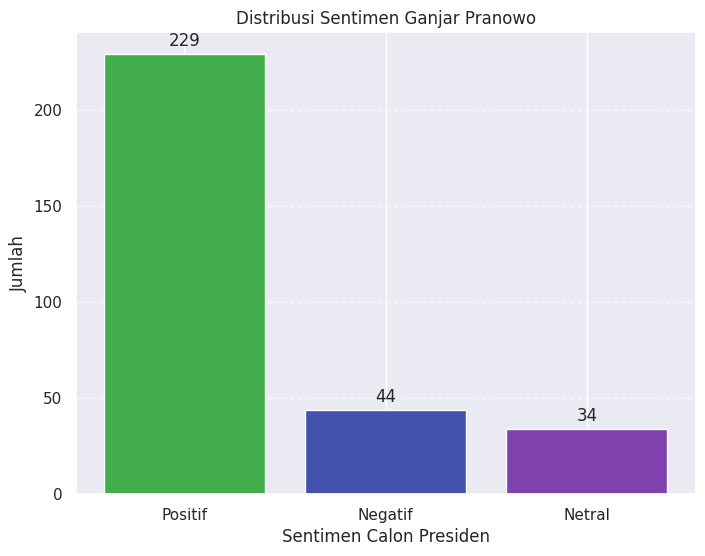

In [ ]:
# Visualisasi Klasifikasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#43ad4d', '#4352ad', '#8043ad'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",  # Fix the typo here
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen Calon Presiden')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


# Klasifikasi

In [ ]:
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...,Positif
...,...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...,Negatif
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...,Positif
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...,Positif
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...,Positif


In [ ]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if n[1] == 'Positif':
        set_positif.append(n)
    elif n[1] == 'Negatif':
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)


In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Sentimen: ", cl.accuracy(dataset))

Akurasi Sentimen:  0.8241042345276873


In [ ]:
#Labeling Ulang
data_tweet = list(data['tweet_english'])
polaritas = 0
status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet, classifier=cl)

  if analysis.classify() == 'Positif':
    total_positif += 1
  elif analysis.classify() == 'Netral':
    total_netral += 1
  else:
    total_negatif += 1

  status.append(analysis.classify())
  total += 1

  print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
  print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 1
Netral = 0
Negatif = 0

Total Data : 1
Hasil Analisis Data:
Positif = 2
Netral = 0
Negatif = 0

Total Data : 2
Hasil Analisis Data:
Positif = 3
Netral = 0
Negatif = 0

Total Data : 3
Hasil Analisis Data:
Positif = 4
Netral = 0
Negatif = 0

Total Data : 4
Hasil Analisis Data:
Positif = 5
Netral = 0
Negatif = 0

Total Data : 5
Hasil Analisis Data:
Positif = 6
Netral = 0
Negatif = 0

Total Data : 6
Hasil Analisis Data:
Positif = 7
Netral = 0
Negatif = 0

Total Data : 7
Hasil Analisis Data:
Positif = 8
Netral = 0
Negatif = 0

Total Data : 8
Hasil Analisis Data:
Positif = 9
Netral = 0
Negatif = 0

Total Data : 9
Hasil Analisis Data:
Positif = 10
Netral = 0
Negatif = 0

Total Data : 10
Hasil Analisis Data:
Positif = 11
Netral = 0
Negatif = 0

Total Data : 11
Hasil Analisis Data:
Positif = 11
Netral = 1
Negatif = 0

Total Data : 12
Hasil Analisis Data:
Positif = 12
Netral = 1
Negatif = 0

Total Data : 13
Hasil Analisis Data:
Positif = 13
Netral = 1
Negatif = 0

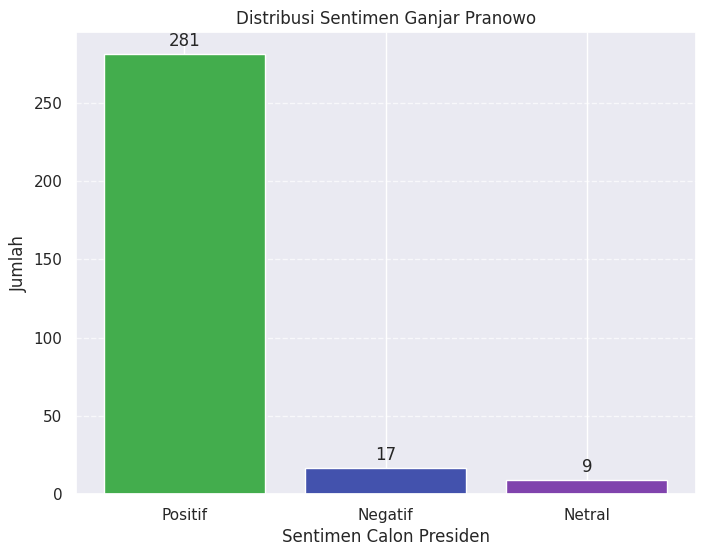

In [ ]:
# Visualisasi Klasifikasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#43ad4d', '#4352ad', '#8043ad'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",  # Fix the typo here
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen Calon Presiden')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


In [ ]:
status = pd.DataFrame({"Klasifikasi Bayes": status})
  # Corrected indentation
data['klasifikasi_bayes'] = status

In [ ]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,Netral,Positif
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,Netral,Positif
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,Positif,Positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,Netral,Positif
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...,Positif,Positif
...,...,...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...,Negatif,Positif
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...,Positif,Positif
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...,Positif,Positif
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...,Positif,Positif


In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifierBayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")


Text: ganjar pranowo pak mahfud md moga pimpin kalian pancar hangat keluarga 
Classifier: Netral
ClassifierBayes: Positif

Text: dukung mas ganjar pak mahfud dukung pimpin paham butuh aspirasi keluarga 
Classifier: Netral
ClassifierBayes: Positif

Text: ganjar pranowo mahfud md pimpin komitmen jabat keluarga rakyat 
Classifier: Netral
ClassifierBayes: Positif

Text: dukung ganjar mahfud tambah kali dukung datang ulama baris lauhil mahfud se priangan timur gas
Classifier: Negatif
ClassifierBayes: Positif

Text: keluarga ganjar pranowo cermin harmonis implementasi pimpin negara 
Classifier: Negatif
ClassifierBayes: Positif

Text: ganjar pranowo mahfud md sosok milik visi jalan mesra keluarga jadi nilai tambah pimpin 
Classifier: Netral
ClassifierBayes: Positif

Text: ganjar pranowo sama juang masa depan lebih cerah jakarta 
Classifier: Netral
ClassifierBayes: Positif

Text: ra ganjar ra nyoblos
Classifier: Negatif
ClassifierBayes: Positif

Text: mahfud md harap semangat sama wujud pimpin